(7, 101)
(4, 101)
(4, 101)


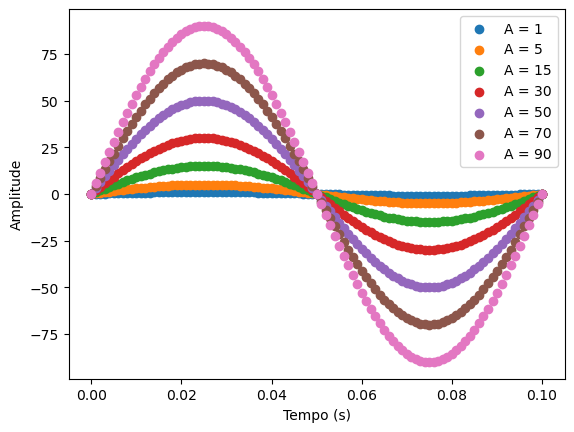

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def get_signal(f0,t,amplitude, noise=False, noise_std = 0.3):
    if noise == True:
        return amplitude*np.sin(2*np.pi*f0*t) + np.random.uniform(noise_std*amplitude, -noise_std*amplitude, len(t))
        
    return amplitude*np.sin(2*np.pi*f0*t)

def make_set(amplitudes, frequence, time):
    flag = False
    target = []
    features = []
    noise_list = [0.3,0.4,0.5]
    for a in amplitudes:
        signal_pure = get_signal(frequence, time, a)
        signal_noise = get_signal(frequence, time, a, True, noise_list[np.random.randint(0,len(noise_list)-1)])

        if flag == False:
            features = signal_pure.reshape(1,-1)
            target = signal_pure.reshape(1, -1)
            flag = True
        else:
            target = np.concatenate((target, signal_pure.reshape(1,-1)), axis=0)
            features = np.concatenate((features, signal_pure.reshape(1,-1)), axis=0)
    return (features, target)

f0 = 10 #frequencia do sinal hz
periodo = 1/f0 #intervalo de amostragem
N_amostras = 100
ts = periodo / N_amostras
time = np.arange(0, periodo + ts, ts)

train_set_amplitudes = [1,5,15,30,50,70,90]
train_set, train_target = make_set(train_set_amplitudes, f0, time)
validation_set_amplitudes = [10,20,60,80]
validation_set, validation_target = make_set(validation_set_amplitudes, f0, time)
test_set_amplitudes = [12,40,75,100]
test_set, test_target = make_set([12,40,75,100], f0, time)

for i, a in enumerate(train_set_amplitudes):
    plt.scatter(time, train_set[i,:], label = f"A = {a}")
plt.xlabel("Tempo (s)")
plt.ylabel("Amplitude")
plt.legend()
print (train_set.shape)
print (validation_set.shape)
print (test_set.shape)

In [2]:
from sklearn import preprocessing as pre

input_data_scaler = pre.MinMaxScaler()
target_scaler = pre.MinMaxScaler()
train_set_scaled = input_data_scaler.fit_transform(train_set)
train_target_scaled = target_scaler.fit_transform(train_target)

validation_set_scaled = input_data_scaler.transform(validation_set)
validation_target_scaled = target_scaler.transform(validation_target)

In [3]:
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
from tensorflow_addons.metrics import RSquare
tf.keras.utils.set_random_seed(0)

neurons_std_amount = train_set_scaled.shape[1]

model = Sequential()
model.add(tf.keras.Input(neurons_std_amount))
model.add(Dense(neurons_std_amount, activation=tf.keras.activations.swish, name="Encoder"))
model.add(Dense(1, activation=tf.keras.activations.swish, kernel_regularizer=tf.keras.regularizers.l1(0.1), name="Latent-Space"))
model.add(Dense(neurons_std_amount, activation=tf.keras.activations.swish, name="Decoder"))
model.add(Dense(neurons_std_amount, activation=tf.keras.activations.swish, name="Output"))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=[RSquare()])
model.summary()

c:\Users\leonardo\miniconda3\envs\ml_env\lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Encoder (Dense)             (None, 101)               10302     
                                                                 
 Latent-Space (Dense)        (None, 1)                 102       
                                                                 
 Decoder (Dense)             (None, 101)               202       
                                                                 
 Output (Dense)              (None, 101)               10302     
                                                                 
Total params: 20,908
Trainable params: 20,908
Non-trainable params: 0
_________________________________________________________________


In [4]:
model.fit(train_set_scaled, train_target_scaled, validation_data=(validation_set_scaled, validation_target_scaled), epochs=430)

Epoch 1/430
1/1 [==============================] - 4s 4s/step - loss: 1.6400 - r_square: -2.0524 - val_loss: 1.6004 - val_r_square: -2.3975
Epoch 2/430
1/1 [==============================] - 0s 34ms/step - loss: 1.6289 - r_square: -2.0439 - val_loss: 1.5894 - val_r_square: -2.3873
Epoch 3/430
1/1 [==============================] - 0s 33ms/step - loss: 1.6177 - r_square: -2.0348 - val_loss: 1.5783 - val_r_square: -2.3766
Epoch 4/430
1/1 [==============================] - 0s 35ms/step - loss: 1.6066 - r_square: -2.0252 - val_loss: 1.5672 - val_r_square: -2.3659
Epoch 5/430
1/1 [==============================] - 0s 36ms/step - loss: 1.5954 - r_square: -2.0156 - val_loss: 1.5560 - val_r_square: -2.3550
Epoch 6/430
1/1 [==============================] - 0s 35ms/step - loss: 1.5842 - r_square: -2.0059 - val_loss: 1.5449 - val_r_square: -2.3437
Epoch 7/430
1/1 [==============================] - 0s 34ms/step - loss: 1.5729 - r_square: -1.9959 - val_loss: 1.5338 - val_r_square: -2.3317
Epoch 8/

In [5]:
import pathlib
import os
import time

CURRENT_FILE_LOCATION = pathlib.Path(os.getcwd())
PATH_SAVED = CURRENT_FILE_LOCATION / "saved_models" / str(time.time())

model.save(PATH_SAVED)

INFO:tensorflow:Assets written to: c:\Users\leonardo\Documents\mestrado\ML\AutoEncoders\saved_models\1682961844.3087547\assets


c:\Users\leonardo\Documents\mestrado\ML\AutoEncoders\saved_models\1682961844.3087547
1/1 [==============================] - 0s 101ms/step


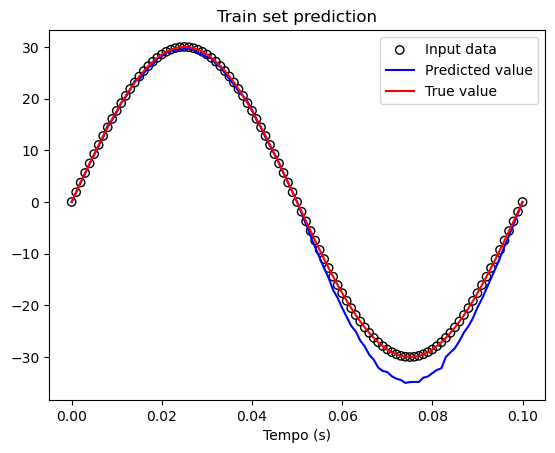

In [6]:
import tensorflow as tf

print (PATH_SAVED)
f0 = 10 #frequencia do sinal hz
periodo = 1/f0 #intervalo de amostragem
N_amostras = 100
ts = periodo / N_amostras
time = np.arange(0, periodo + ts, ts)

model = tf.keras.models.load_model(PATH_SAVED)

signal_row = 3
sinal_predito_scaled = model.predict(train_set_scaled)


input_data = input_data_scaler.inverse_transform(train_set_scaled)
target = target_scaler.inverse_transform(train_target_scaled)
sinal_predito = target_scaler.inverse_transform(sinal_predito_scaled)

plt.scatter(time, input_data[signal_row,:], label="Input data", facecolors='none', edgecolors='k')
plt.xlabel("Tempo (s)")
plt.plot(time, sinal_predito[signal_row, :], label="Predicted value", color='blue')
plt.plot(time, target[signal_row, :], label="True value", color='red')
plt.legend()
plt.title("Train set prediction")
plt.show()

1/1 [==============================] - 0s 21ms/step


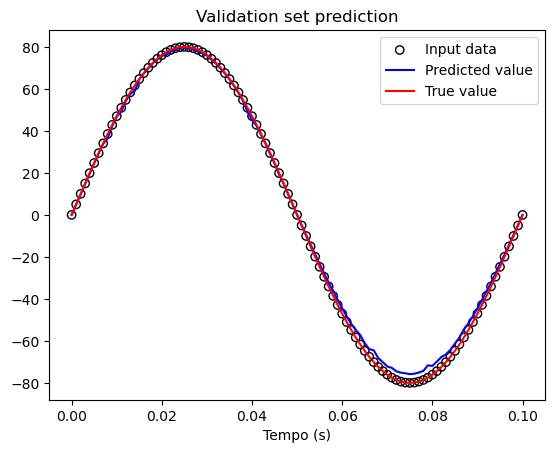

In [7]:
signal_row = 3
sinal_predito_scaled = model.predict(validation_set_scaled)


input_data = input_data_scaler.inverse_transform(validation_set_scaled)
target = target_scaler.inverse_transform(validation_target_scaled)
sinal_predito = target_scaler.inverse_transform(sinal_predito_scaled)

plt.scatter(time, input_data[signal_row,:], label="Input data", facecolors='none', edgecolors='k')
plt.xlabel("Tempo (s)")
plt.plot(time, sinal_predito[signal_row, :], label="Predicted value", color='blue')
plt.plot(time, target[signal_row, :], label="True value", color='red')
plt.legend()
plt.title("Validation set prediction")
plt.show()

1/1 [==============================] - 0s 17ms/step
Test set Rsquare score = 0.9030596912224516


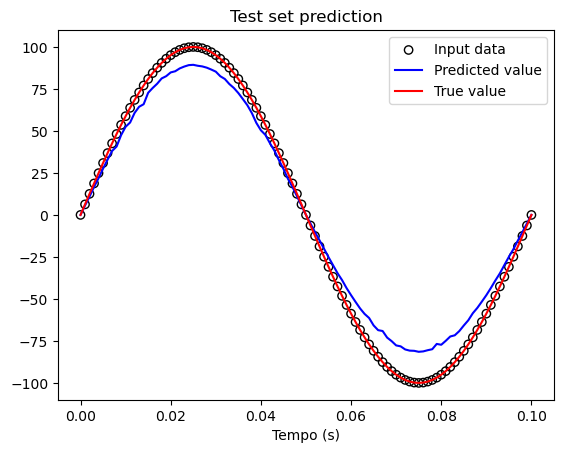

In [8]:
from sklearn.metrics import r2_score

signal_row = 3
test_set_scaled = input_data_scaler.transform(test_set)
test_target_scaled = target_scaler.transform(test_target)

sinal_predito_scaled = model.predict(test_set_scaled)

score = r2_score(sinal_predito_scaled, test_target_scaled)

print (f"Test set Rsquare score = {score}")

input_data = input_data_scaler.inverse_transform(test_set_scaled)
target = target_scaler.inverse_transform(test_target_scaled)
sinal_predito = target_scaler.inverse_transform(sinal_predito_scaled)

plt.scatter(time, input_data[signal_row,:], label="Input data", facecolors='none', edgecolors='k')
plt.xlabel("Tempo (s)")
plt.plot(time, sinal_predito[signal_row, :], label="Predicted value", color='blue')
plt.plot(time, target[signal_row, :], label="True value", color='red')
plt.legend()
plt.title("Test set prediction")
plt.show()

1/1 [==============================] - 0s 21ms/step


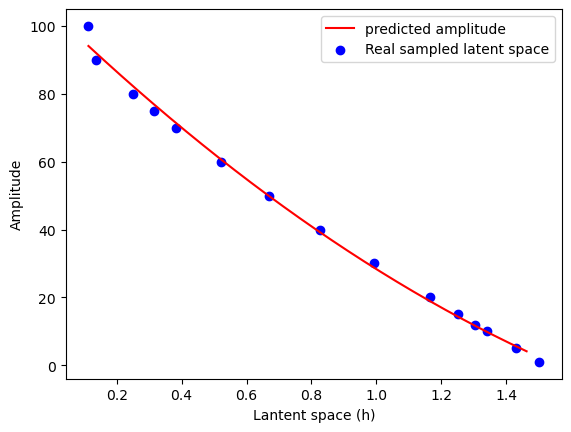

In [9]:
model = tf.keras.models.load_model(PATH_SAVED)

encoder = tf.keras.Model(
                    inputs=model.input,
                    outputs=model.get_layer("Latent-Space").output
                    )

train_set_h = encoder.predict(train_set_scaled)
validation_set_h = encoder.predict(validation_set_scaled)
test_set_h = encoder.predict(test_set_scaled)

train_set_h_a = np.concatenate((train_set_h, np.array(train_set_amplitudes).reshape(-1,1)), axis=1)
validation_set_h_a = np.concatenate((validation_set_h, np.array(validation_set_amplitudes).reshape(-1,1)), axis=1)
test_set_h_a = np.concatenate((test_set_h, np.array(test_set_amplitudes).reshape(-1,1)), axis=1)

latent_space_h_per_a = np.concatenate((train_set_h_a, validation_set_h_a, test_set_h_a), axis=0)

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=2)

X_poly = poly_reg.fit_transform(np.reshape(latent_space_h_per_a[:,0],(-1,1)))

regressor = LinearRegression()
regressor.fit(X_poly, latent_space_h_per_a[:,1].reshape(-1,1))

h_domain = np.arange(latent_space_h_per_a[:,0].min(), latent_space_h_per_a[:,0].max(), 0.05)
amplitudes_per_h_predicted = regressor.predict(poly_reg.fit_transform(h_domain.reshape(-1,1)))

plt.plot(h_domain, amplitudes_per_h_predicted, color = "red", label = "predicted amplitude")
plt.xlabel("Lantent space (h)")
plt.ylabel("Amplitude")
plt.scatter(latent_space_h_per_a[:,0], latent_space_h_per_a[:,1], label = "Real sampled latent space", color="blue")
plt.legend()

1/1 [==============================] - 0s 74ms/step


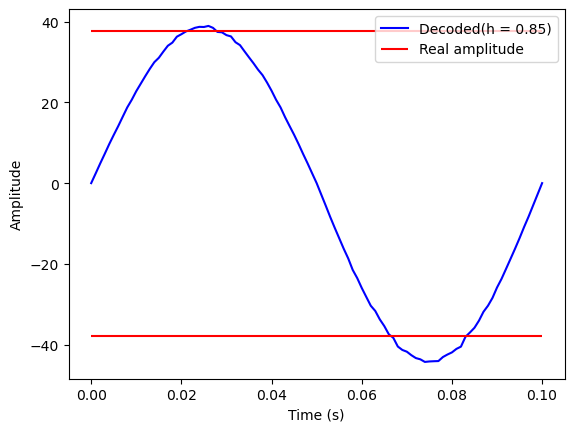

In [13]:
model = tf.keras.models.load_model(PATH_SAVED)

decoder = tf.keras.Model(
                    inputs=model.get_layer("Latent-Space").output,
                    outputs=model.get_layer("Output").output
                    )

h_space_to_predict = np.random.uniform(h_domain.min(), h_domain.max())
predicted_amplituded = regressor.predict(poly_reg.fit_transform([[h_space_to_predict]]))

scaled_prediction = decoder.predict([h_space_to_predict])
prediction = target_scaler.inverse_transform(scaled_prediction)

h_show = round(h_space_to_predict,2)
plt.plot(time, prediction[0,:], color = "blue", label = f"Decoded(h = {h_show})")
plt.hlines(predicted_amplituded, time.min(), time.max(), color = "red", label = "Real amplitude")
plt.hlines(-1*predicted_amplituded, time.min(), time.max(), color = "red")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()